# Logistic Regression for Identifying Depression Among Students
### Complete Solution to All Tasks (Corrected with Proper Column Names and Fixes)

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, classification_report
)

# Load Data
#df = pd.read_csv('Student Depression Dataset.csv')
df = pd.read_csv('C:\\Users\\Darya\\Desktop\\Новая папка (1)\\Github\\World of programming\\Machine learning 2025\\ml\\Seminar 10\\Student Depression Dataset.csv')  # Uncomment if you need to load
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Task 1 – Explore the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

None

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

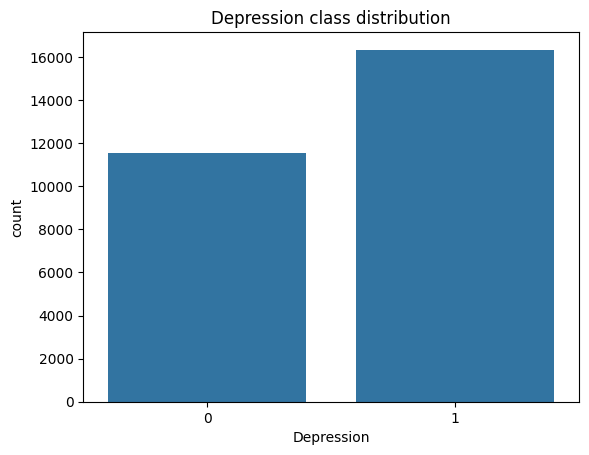

In [5]:
# Basic info, missing values, datatypes
display(df.info())
display(df.describe(include='all'))
display(df.isnull().sum())

# Explore class balance
sns.countplot(x='Depression', data=df)
plt.title('Depression class distribution')
plt.show()

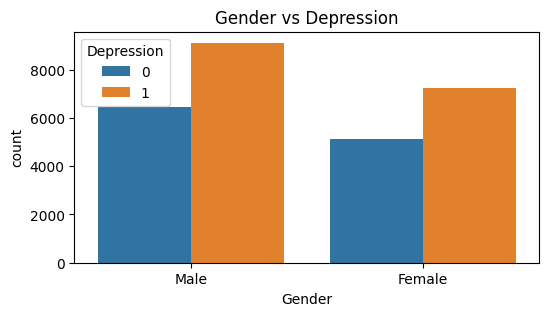

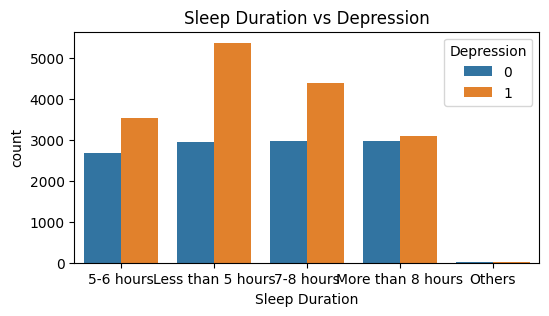

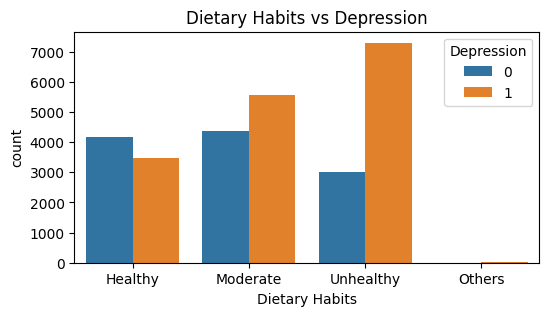

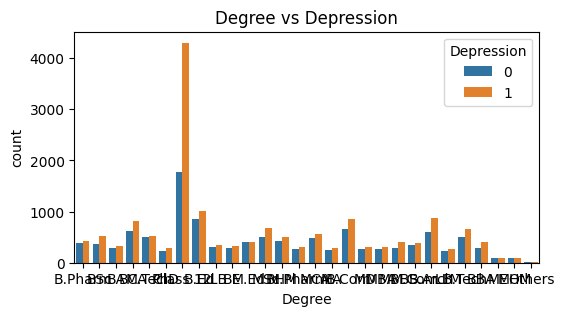

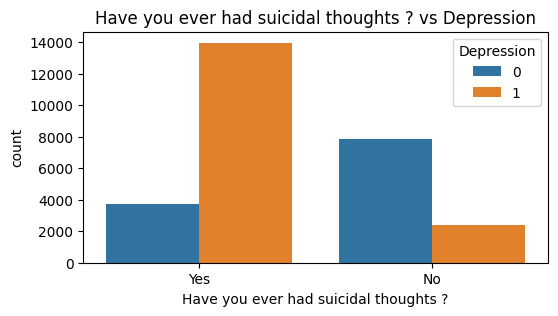

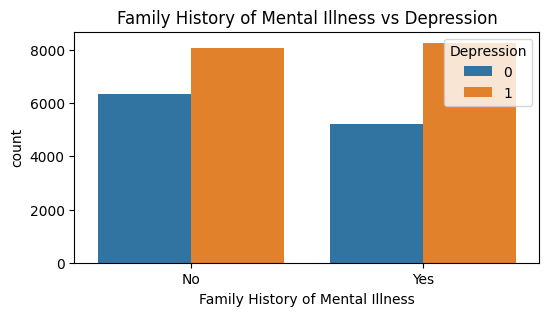

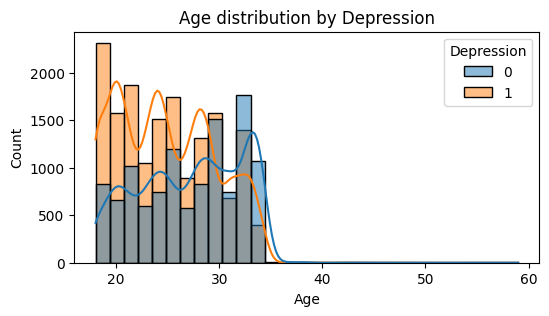

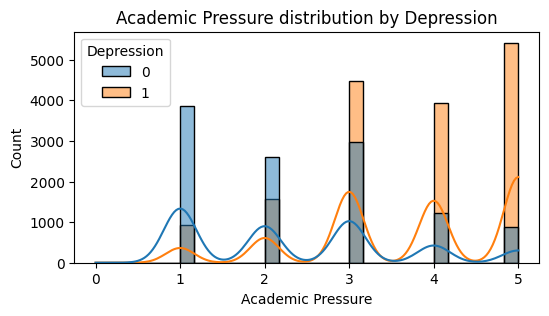

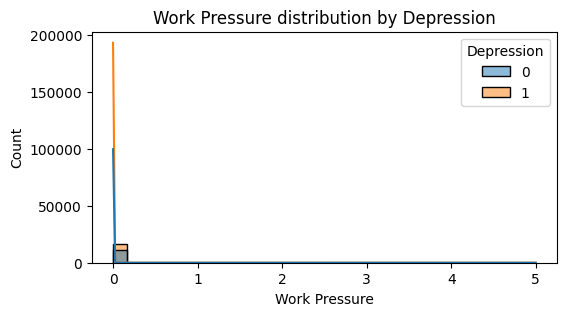

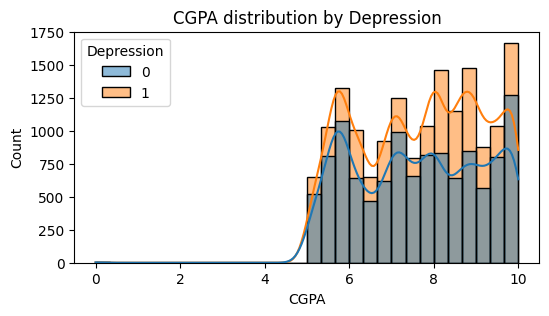

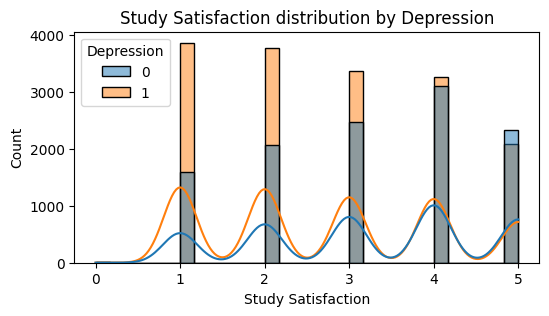

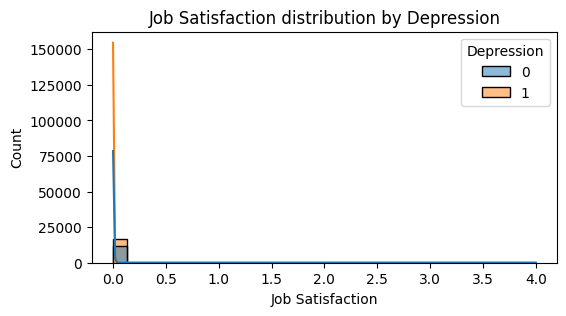

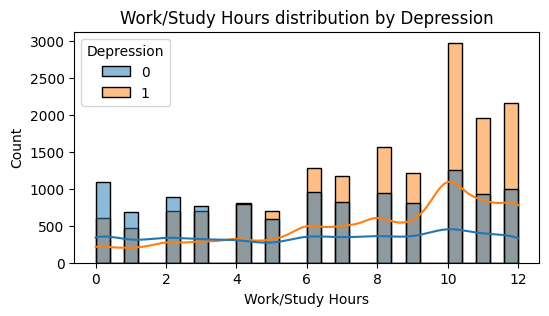

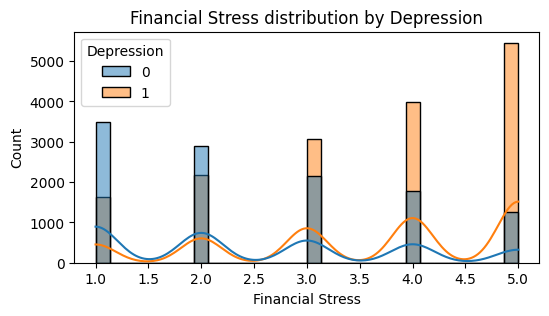

ValueError: could not convert string to float: 'Visakhapatnam'

<Figure size 1400x800 with 0 Axes>

In [6]:
# Visualize relationships between features and depression
categorical = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numerical = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Categorical features vs Depression
for col in categorical:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Depression', data=df)
    plt.title(f'{col} vs Depression')
    plt.show()

# Numerical features vs Depression
for col in numerical:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Depression', kde=True, bins=30)
    plt.title(f'{col} distribution by Depression')
    plt.show()

# Heatmap of correlations (after encoding categorical for visualization)
df_viz = df.copy()
for col in categorical:
    df_viz[col] = LabelEncoder().fit_transform(df_viz[col].astype(str))
plt.figure(figsize=(14,8))
sns.heatmap(df_viz.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

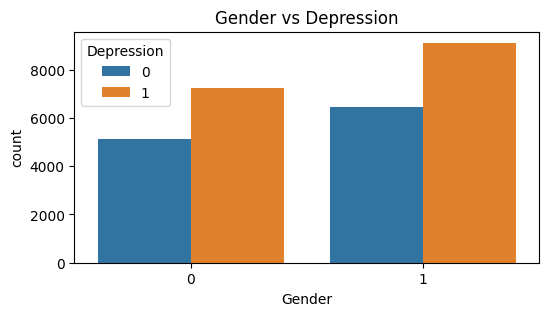

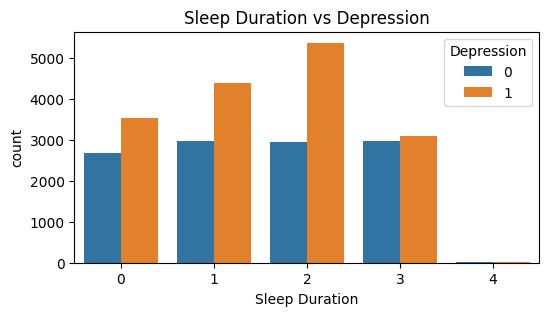

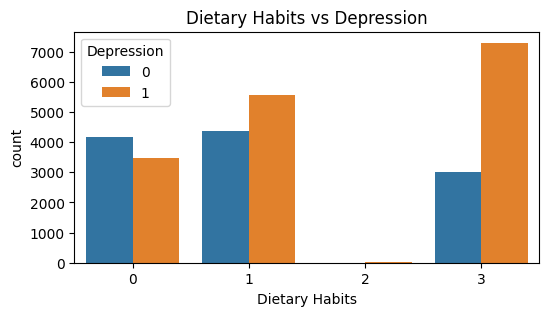

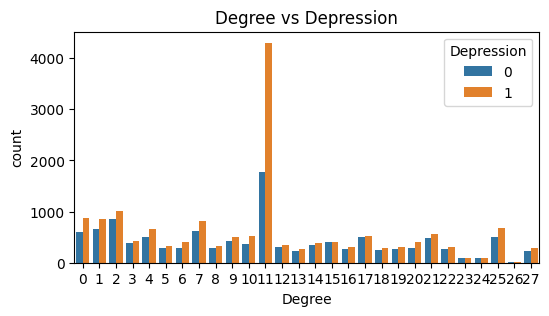

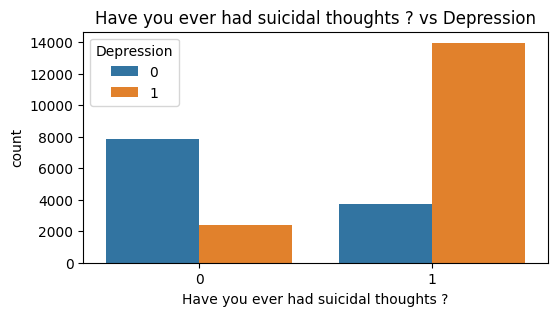

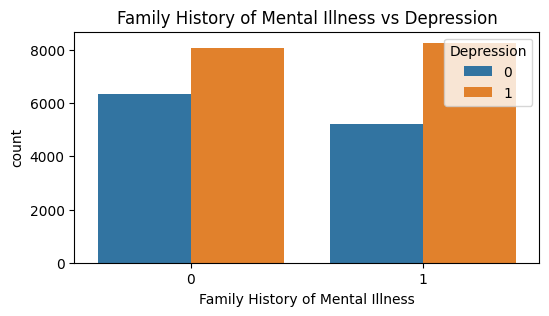

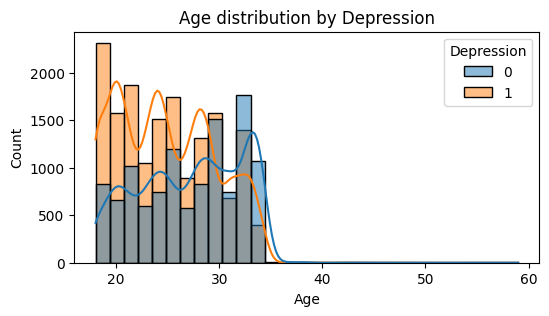

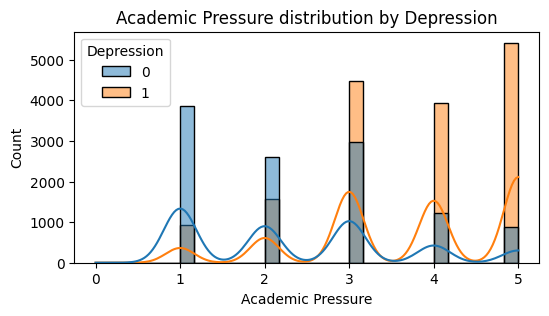

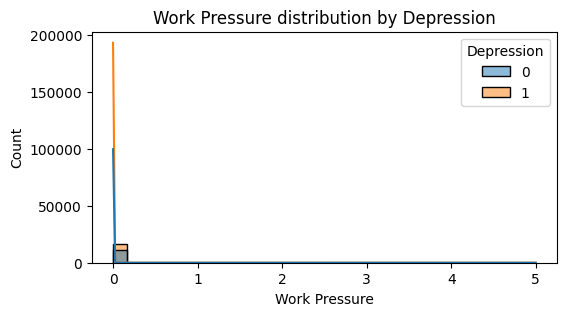

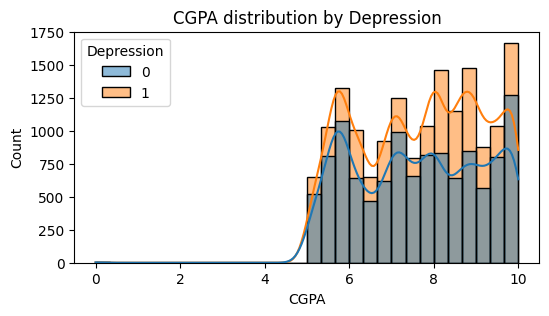

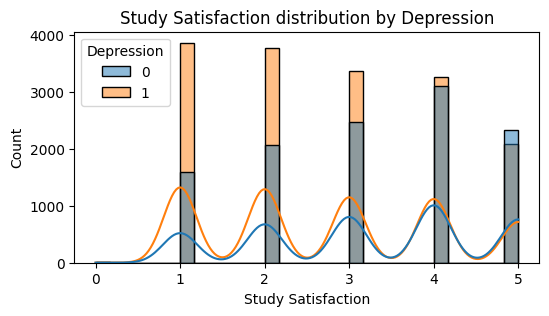

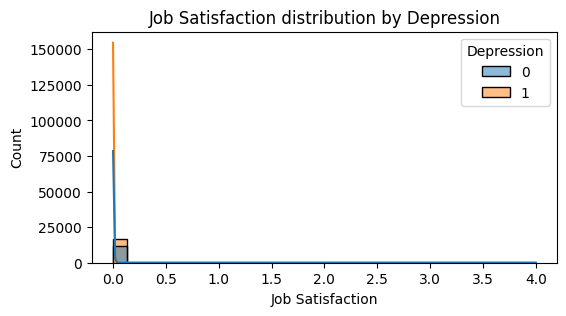

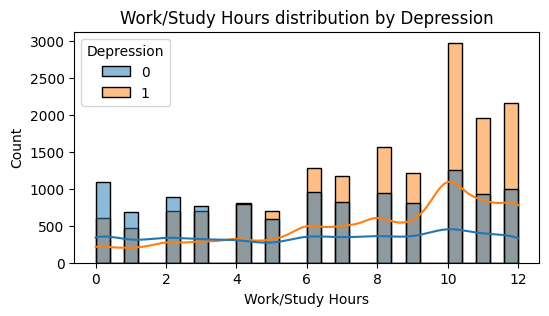

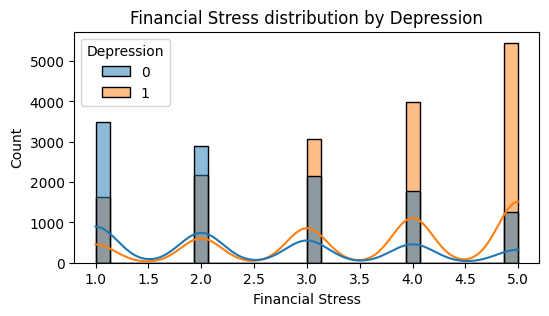

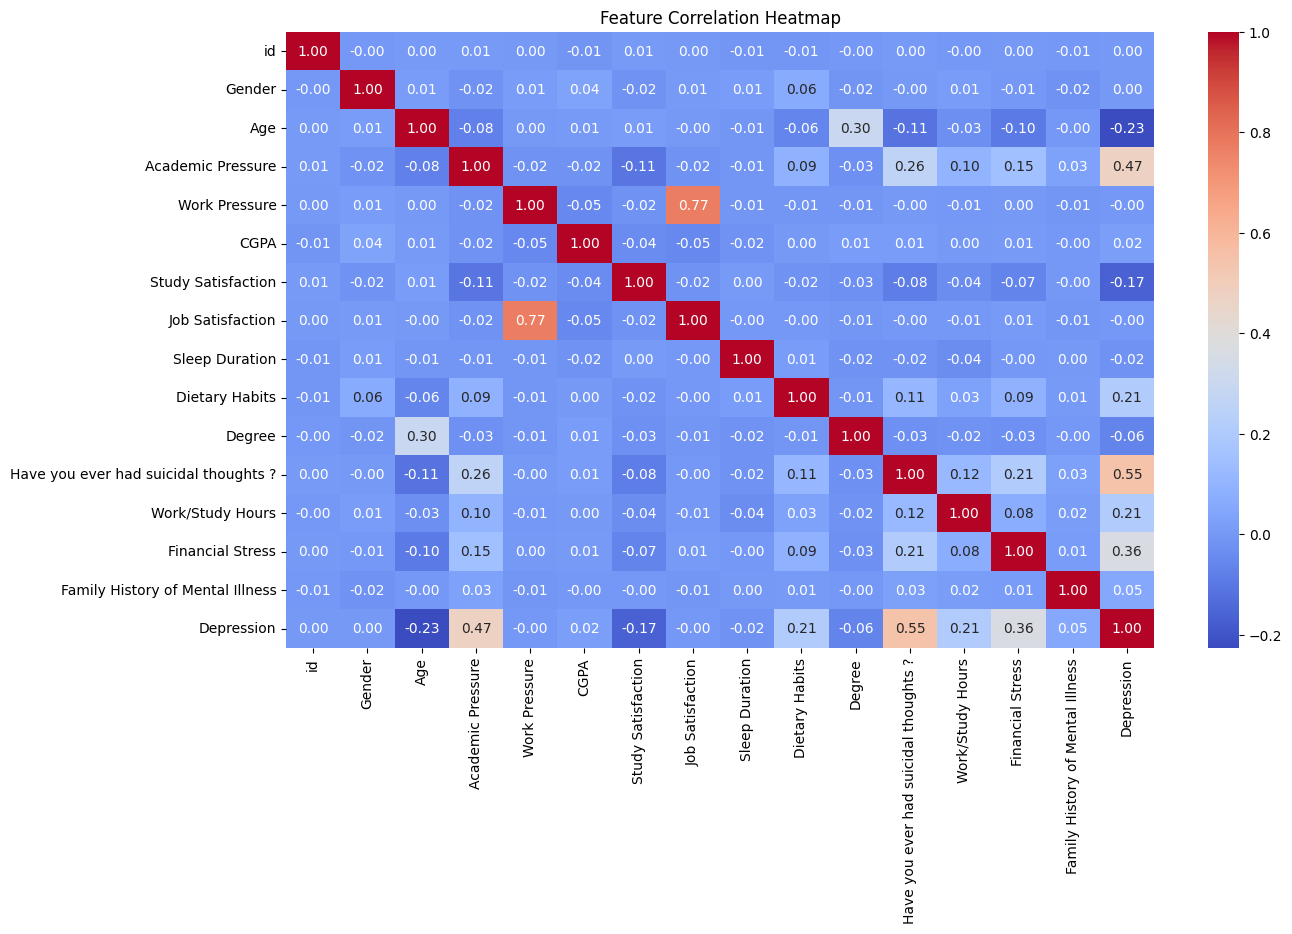

In [15]:
categorical = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numerical = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Categorical features vs Depression
for col in categorical:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Depression', data=df)
    plt.title(f'{col} vs Depression')
    plt.show()

# Numerical features vs Depression
for col in numerical:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Depression', kde=True, bins=30)
    plt.title(f'{col} distribution by Depression')
    plt.show()

# Heatmap of correlations (after encoding categorical for visualization)
df_viz = df.copy()
for col in categorical:
    df_viz[col] = LabelEncoder().fit_transform(df_viz[col].astype(str))

# Only keep numeric columns for correlation
df_viz_numeric = df_viz.select_dtypes(include=[np.number])

plt.figure(figsize=(14,8))
sns.heatmap(df_viz_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Task 2 – Data Preprocessing

In [7]:
# Fix column names to match CSV exactly for binary encoding
BINARY_LABELS = {
    'Gender': {'Female': 0, 'Male': 1},
    'Have you ever had suicidal thoughts ?': {'No': 0, 'Yes': 1},
    'Family History of Mental Illness': {'No': 0, 'Yes': 1},
}
for col, mapping in BINARY_LABELS.items():
    df[col] = df[col].map(mapping)

# Label encode other categoricals
cat_cols = ['Sleep Duration', 'Dietary Habits', 'Degree']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Fill missing values if any
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Drop non-model columns
X = df.drop(['id', 'City', 'Profession', 'Depression'], axis=1)
y = df['Depression']

# Standardize numeric columns
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Show processed features
X.head()

C:\Temp\ipykernel_16800\780164666.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,0,0,3,1,-1.121213,-1.488857,0
1,0,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,0,1,10,0,-1.121213,-0.793081,1
2,1,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,2,0,5,0,0.497095,-1.488857,1
3,0,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,1,1,7,1,-0.851495,1.294246,1
4,0,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,0,1,17,1,-1.660650,-1.488857,0


## Task 3 – Train the Model

In [8]:
# Train/test split (always stratify on imbalanced target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

## Task 4 – Evaluate the Model

In [9]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix [TN FP; FN TP]:\n", cm)
print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print('\nClassification report:')
print(classification_report(y_test, y_pred))

Confusion Matrix [TN FP; FN TP]:
 [[1826  487]
 [ 392 2876]]
Accuracy: 0.843 | Precision: 0.855 | Recall: 0.880 | F1: 0.867

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581



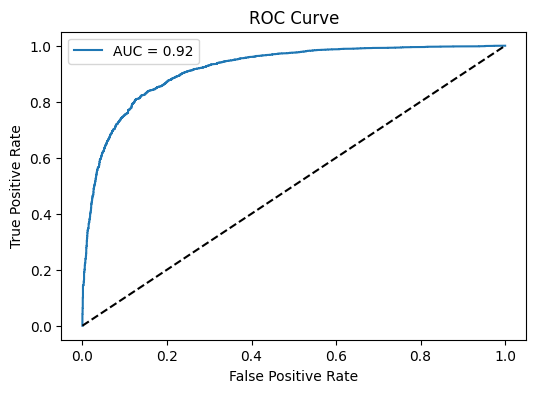

In [10]:
# ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Part two - Task 1: Evaluate and Visualize Metric Changes Across Thresholds

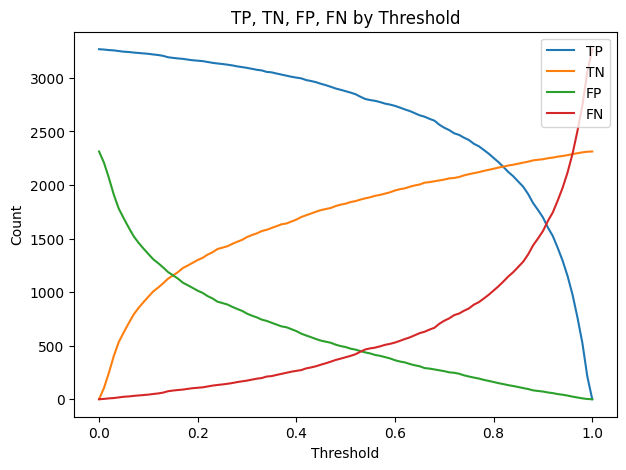

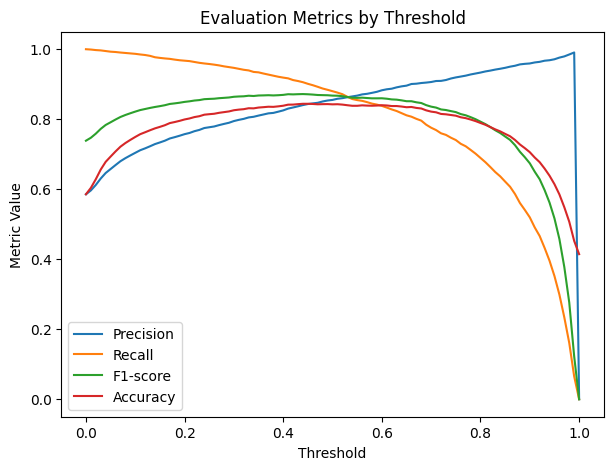

In [11]:
thresholds_plot = np.linspace(0, 1, 101)
TPs, TNs, FPs, FNs = [], [], [], []
precisions, recalls, f1s, accs = [], [], [], []
for thresh in thresholds_plot:
    y_thresh = (y_pred_prob >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_thresh).ravel()
    TPs.append(tp)
    TNs.append(tn)
    FPs.append(fp)
    FNs.append(fn)
    precisions.append(tp/(tp+fp) if (tp+fp)>0 else 0)
    recalls.append(tp/(tp+fn) if (tp+fn)>0 else 0)
    f1s.append(f1_score(y_test, y_thresh))
    accs.append(accuracy_score(y_test, y_thresh))

# Plot TP, TN, FP, FN vs threshold
plt.figure(figsize=(7,5))
plt.plot(thresholds_plot, TPs, label='TP')
plt.plot(thresholds_plot, TNs, label='TN')
plt.plot(thresholds_plot, FPs, label='FP')
plt.plot(thresholds_plot, FNs, label='FN')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('TP, TN, FP, FN by Threshold')
plt.legend()
plt.show()

# Plot evaluation metrics vs threshold
plt.figure(figsize=(7,5))
plt.plot(thresholds_plot, precisions, label='Precision')
plt.plot(thresholds_plot, recalls, label='Recall')
plt.plot(thresholds_plot, f1s, label='F1-score')
plt.plot(thresholds_plot, accs, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics by Threshold')
plt.legend()
plt.show()

**Explanation:**

As the threshold increases, the model becomes stricter and predicts fewer positives (1's), so TP typically drops and TN rises. Precision usually increases, recall decreases. The optimal threshold depends on the application (see next task).

## Part two - Task 2: Include a Financial Cost

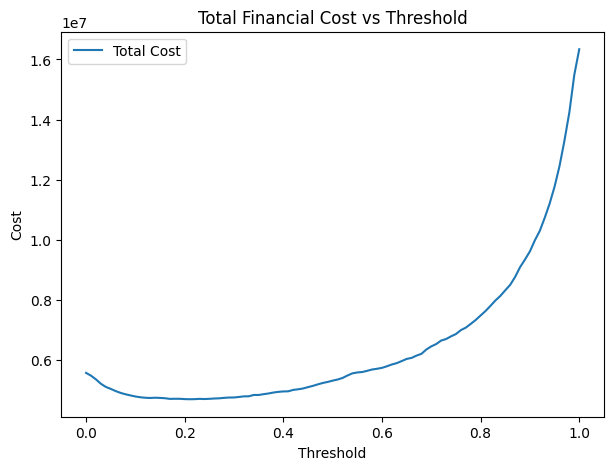

Optimal threshold (min total cost): 0.21 with cost 4705000.00


In [12]:
# Cost calculation: assume cost_per_positive (hospital) and cost_per_false_negative (missed case)
cost_per_positive = 1000  # cost for sending a student to hospital (TP or FP)
cost_per_fn = 5000        # cost for missing a depressed student

costs = []
for tp, fp, fn in zip(TPs, FPs, FNs):
    cost = (tp+fp)*cost_per_positive + fn*cost_per_fn
    costs.append(cost)

# Plot cost vs threshold
plt.figure(figsize=(7,5))
plt.plot(thresholds_plot, costs, label='Total Cost')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Total Financial Cost vs Threshold')
plt.legend()
plt.show()

# Find optimal threshold
min_cost_idx = np.argmin(costs)
optimal_threshold = thresholds_plot[min_cost_idx]
print(f'Optimal threshold (min total cost): {optimal_threshold:.2f} with cost {costs[min_cost_idx]:.2f}')

## Part two - Task 3: Cross validation & hyperparameters optimization

In [13]:
# Hyperparameters in LogisticRegression: C (regularization), penalty, solver, etc.
# We'll use GridSearchCV to find the best C and penalty.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # l1 needs liblinear
    'solver': ['lbfgs']
}
gs = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1')
gs.fit(X, y)
print(f'Best params: {gs.best_params_}')
print(f'Best cross-validated F1: {gs.best_score_:.2f}')

Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated F1: 0.87


## Part two - Task 4: Investigate and understand predictions

In [14]:
# Refit best model on train for interpretability
best_lr = LogisticRegression(max_iter=1000, random_state=42, **gs.best_params_)
best_lr.fit(X_train, y_train)
y_pred_best = best_lr.predict(X_test)
y_pred_prob_best = best_lr.predict_proba(X_test)[:,1]

# Analyze TP, TN, FP, FN populations
df_test = X_test.copy()
df_test['True'] = y_test.values
df_test['Pred'] = y_pred_best
df_test['PredProb'] = y_pred_prob_best
df_test['Group'] = 'Other'
df_test.loc[(df_test['True']==1)&(df_test['Pred']==1), 'Group'] = 'TP'
df_test.loc[(df_test['True']==0)&(df_test['Pred']==0), 'Group'] = 'TN'
df_test.loc[(df_test['True']==0)&(df_test['Pred']==1), 'Group'] = 'FP'
df_test.loc[(df_test['True']==1)&(df_test['Pred']==0), 'Group'] = 'FN'

# Compare feature means by group
group_means = df_test.groupby('Group')[numerical+cat_cols+BINARY_LABELS.keys()].mean(numeric_only=True)
display(group_means)

# Plot feature distribution for a few important features
for feat in ['Academic Pressure', 'CGPA', 'Sleep Duration']:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Group', y=feat, data=df_test)
    plt.title(f'{feat} by TP/TN/FP/FN')
    plt.show()

# Logistic regression weights (feature importances)
feature_importance = pd.Series(best_lr.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,7))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Weights)')
plt.show()
display(feature_importance)

TypeError: can only concatenate list (not "dict_keys") to list

# Conclusion

We have built a full logistic regression pipeline for predicting depression among students, explored the data visually, handled missing values and categorical variables, evaluated the model using various classification metrics, explored the effect of thresholding and financial cost, optimized hyperparameters using cross-validation, and finally interpreted the model using predictions and feature importances. 

Key takeaways:
- The threshold for classification should be chosen based on the application, especially if financial or health costs are involved.
- Logistic regression weights offer an interpretable way to understand which factors most impact depression risk in students.
- Group-level analysis (TP, TN, FP, FN) can uncover where the model struggles and which subgroups are misclassified.

You can further extend this analysis with more advanced models, feature engineering, or domain-specific insights.